In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cartopy import config
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import cartopy.io.shapereader as shpreader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patheffects as path_effects
import warnings
warnings.filterwarnings('ignore')


In [2]:
mera = xr.open_mfdataset(r'G:\new\2022\MERRA2_400.tavg1_2d_aer_Nx.2023*',
#                         concat_dim='time',
#                         combine='by_coords'
                        )
mera


<xarray.Dataset>
Dimensions:    (lon: 576, lat: 361, time: 1464)
Coordinates:
  * lon        (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat        (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * time       (time) datetime64[ns] 2023-05-01T00:30:00 ... 2023-06-30T23:30:00
Data variables: (12/50)
    BCANGSTR   (time, lat, lon) float32 dask.array<chunksize=(24, 361, 576), meta=np.ndarray>
    BCCMASS    (time, lat, lon) float32 dask.array<chunksize=(24, 361, 576), meta=np.ndarray>
    BCEXTTAU   (time, lat, lon) float32 dask.array<chunksize=(24, 361, 576), meta=np.ndarray>
    BCFLUXU    (time, lat, lon) float32 dask.array<chunksize=(24, 361, 576), meta=np.ndarray>
    BCFLUXV    (time, lat, lon) float32 dask.array<chunksize=(24, 361, 576), meta=np.ndarray>
    BCSCATAU   (time, lat, lon) float32 dask.array<chunksize=(24, 361, 576), meta=np.ndarray>
    ...         ...
    SUFLUXU    (time, lat, lon) float32 dask.array<chunksize=(24, 361, 576), meta=np.ndarray>
    SUFLUXV    (time, lat, lon) float32 dask.array<chunksize=(24, 361, 576), meta=np.ndarray>
    SUSCATAU   (time, lat, lon) float32 dask.array<chunksize=(24, 361, 576), meta=np.ndarray>
    TOTANGSTR  (time, lat, lon) float32 dask.array<chunksize=(24, 361, 576), meta=np.ndarray>
    TOTEXTTAU  (time, lat, lon) float32 dask.array<chunksize=(24, 361, 576), meta=np.ndarray>
    TOTSCATAU  (time, lat, lon) float32 dask.array<chunksize=(24, 361, 576), meta=np.ndarray>
Attributes: (12/30)
    History:                           Original file generated: Thu May 11 21...
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Filename:                          MERRA2_400.tavg1_2d_aer_Nx.20230501.nc4
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/KLICLTZ8EM9D
    RangeBeginningDate:                2023-05-01
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2023-05-01
    RangeEndingTime:                   23:59:59.000000

In [3]:
era1 = xr.open_mfdataset(r'G:\new\2022\adaptor.mars.internal-1693238634.3761907-536-9-869705fc-1ba3-465e-abe1-0410b162c446.nc')
era1

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 1464)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2023-05-01 ... 2023-06-30T23:00:00
Data variables:
    u          (time, latitude, longitude) float32 dask.array<chunksize=(1464, 721, 1440), meta=np.ndarray>
    v          (time, latitude, longitude) float32 dask.array<chunksize=(1464, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-08-28 16:05:43 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

### Phet

In [4]:
mera1 = mera.sel(time=slice('2023-05-02', '2023-05-08'))
# del mera
mera1.time.shape

(168,)

In [5]:
era2 = era1.sel(time=slice('2023-05-02', '2023-05-08'))
# del era1
era2.time.shape

(168,)

In [6]:
phetex = pd.read_excel(r'G:\new\2022\mocha.xlsx',
                       usecols='A:K',
                       parse_dates=[['Date(DD/MM/YYYY)', 'Time (UTC)']],
#                        date_format='%Y-%m-%d %H:%M:%S'
                      )
phetex.columns


Index(['Date(DD/MM/YYYY)_Time (UTC)', 'Serial Number of system during year',
       'Basin of origin', 'Name', 'Latitude (lat)', 'longitude  (Long)',
       'CI No [or "T. No"]', 'Estimated Central Pressure (hPa) [or "E.C.P"]',
       'Maximum Sustained Surface Wind (kt) ',
       'Pressure Drop (hPa)[or "delta P"]'],
      dtype='object')

In [ ]:
phetex['Latitude (lat)'][phetex['Date(DD-MM-YYYY)_Time (UTC)']== '2010-06-01 15:00:00']

In [ ]:
# phetex['Date(DD-MM-YYYY)_Time (UTC)']

In [ ]:
import matplotlib.pyplot as plt
plt.plot(phetex['Date(DD-MM-YYYY)_Time (UTC)'],phetex['Maximum Sustained Surface Wind (kt) '])

<Figure size 640x480 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

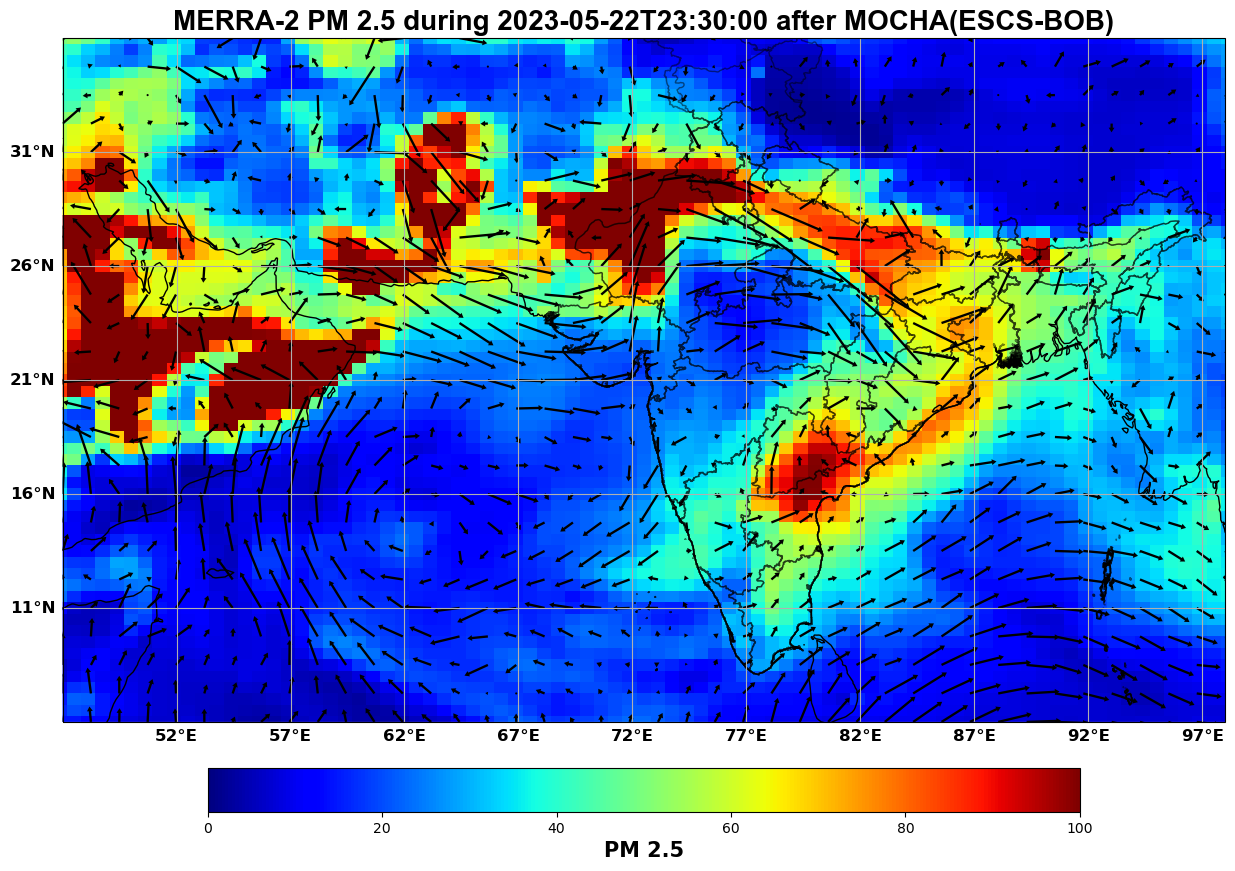

In [12]:
ind = np.arange(13,24*7,24)
dat = np.arange(0,len(mera1.time))
for j in dat:
    pm25 = mera1.DUSMASS25[j] + mera1.OCSMASS[j]+ mera1.BCSMASS[j] \
    + mera1.SSSMASS25[j] + (mera1.SO4SMASS[j]* (132.14/96.06))
        
    fname= r'F:\Indian Shape Files\Indian Administrative bourders\IND_adm\IND_adm1.shp'
    adm1_shapes = list(shpreader.Reader(fname).geometries())
    fname2 = r'F:\Indian Shape Files\Only Indian Boundaries\India_Boundary\India_Boundary.shp'
    adm1_shapes2 = list(shpreader.Reader(fname2).geometries())

    lonmin =47
    lonmax =98
    latmin =6
    latmax =36
    vmin=0
    vmax=100


    def main():
        plt.clf()
        plt.figure(figsize=(15,12),facecolor = 'white')
        ax = plt.axes(projection=ccrs.PlateCarree())
        ax.set_extent([lonmin,lonmax,latmin,latmax], crs=ccrs.PlateCarree()) # [lonmin,lonmax,latmin,latmax]68,98,8,38
        ax.coastlines()
        ax.add_geometries(adm1_shapes, ccrs.PlateCarree(),
                        edgecolor='black', alpha=0.5,lw = 1, facecolor='none') #
        ax.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                edgecolor='black', alpha=0.5,lw = 1, facecolor='none') #
        ax.set_facecolor('white')
        ax.set_title(f'MERRA-2 PM 2.5 during {str(mera1.time[j])[36:55]} after MOCHA(ESCS-BOB)' ,
                        fontweight="bold", size=20,family= 'Arial')
        filled_c = plt.pcolormesh(mera1.lon, mera1.lat,(pm25*1e+9), vmin=vmin, vmax=vmax, cmap='jet', transform=ccrs.PlateCarree())
        ax.quiver(era2.longitude,era2.latitude,np.array(era2.u[j,:,:]),np.array(era2.v[j,:,:]),#
               width= 0.002,
               headwidth=2.5,
               headlength=2,
               headaxislength=2,
               color = 'black',
               regrid_shape=25)
#         ax.plot(phetex['longitude  (Long)'],phetex['Latitude (lat)'],lw=5,c='white',label='MOCHA(ESCS-BOB)')
        try:
            ax.plot(phetex['longitude  (Long)'][phetex.index[phetex['Date(DD/MM/YYYY)_Time (UTC)'] == f'{str(era2.time[j])[36:46]} {str(era2.time[j])[47:55]}'].tolist()],
                       phetex['Latitude (lat)'][phetex.index[phetex['Date(DD/MM/YYYY)_Time (UTC)'] == f'{str(era2.time[j])[36:46]} {str(era2.time[j])[47:55]}'].tolist()],
                       marker = '*',markersize=20,color = 'lime') 
        except:
            pass
        gl = ax.gridlines(draw_labels=True)
        gl.top_labels = False
        gl.right_labels = False
        gl.xlocator = mticker.FixedLocator(np.arange(lonmin,lonmax,5))
        gl.ylocator = mticker.FixedLocator(np.arange(latmin,latmax,5))
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'size': 12,'color': 'black', 'weight': 'bold'}
        gl.ylabel_style = {'size': 12,'color': 'black', 'weight': 'bold'}
            # Add a colorbar for the filled contour.
        a = plt.colorbar(filled_c,ax=ax, orientation='horizontal',pad=0.05,shrink=0.75)
        a.set_label(label=f'PM 2.5',weight='bold', fontsize='15')
#     plt.figtext(0.25, 0.085, "\xa9 kmmraoiitm@gmail.com", ha="center", 
#                 fontsize=15)#box={"facecolor": "green", "alpha": 0.75})
#     plt.legend()
    

    if __name__ == '__main__':
        main()
    plt.savefig(f'G:/new/2022/plots/PM_25_mocha_{str(mera1.time[j])[36:46]}_T{str(mera1.time[j])[47:49]}_{str(mera1.time[j])[50:52]}.jpg',
                bbox_inches='tight',dpi=180)
    #     plt.close() #F:/Cyclones/new/


In [ ]:
for i in np.arange(0,350):
    print(phetex.index[phetex['Date(DD/MM/YYYY)_Time (UTC)'] == f'{str(era2.time[i])[36:46]} {str(era2.time[i])[47:55]}'].tolist())

In [ ]:
import cv2
import os

In [ ]:

# Create a DataFrame.
import pandas as pd
technologies = {
    'Courses':["Spark","PySpark","Python","pandas"],
    'Fee' :[20000,25000,22000,30000],
    'Duration':['30days','40days','35days','50days'],
    'Discount':[1000,2300,1200,2000]
              }
index_labels=['r1','r2','r3','r4']
df = pd.DataFrame(technologies,index=index_labels)
print(df)


In [ ]:

# Check the value of index by unique values.
print('2010-06-01 15:00:00' in phetex['Date(DD-MM-YYYY)_Time (UTC)'].unique())

# Check the value of index by in parameter.
print('2010-06-01 15:00:00' in set(phetex['Date(DD-MM-YYYY)_Time (UTC)']))



In [ ]:
f'{str(mera1.time[i])[36:46]} {str(mera1.time[i])[47:55]}'

In [ ]:
for i in np.arange(0,50):
    a =phetex.index[phetex['Date(DD-MM-YYYY)_Time (UTC)'] == f'{str(era2.time[i])[36:46]} {str(era2.time[i])[47:55]}'].tolist()
    print(a)

In [ ]:
del mera
del era1
del mera1
del era2
del phetex